## Fish Fry Locations in Pittsburgh
##### blah

### Step 1: Getting Our Data

In [1]:
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Load in our data
csv = pd.read_csv("ResturantData.csv")

# Display
resturantData = pd.DataFrame(csv)
resturantData.head()

,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,menu_text,venue_notes,...,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,False,Holy Cross (Reilly Center),Church,"7100 West Ridge Road, Fairview, PA",https://www.holycrossfairview.org,NaN,NaN,NaN,No Fish Fry at this time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,42.039710,-80.245022
1,True,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-...,"Friday Feb 19 from 4:00 PM to 8:00 PM, Friday ...",NaN,NaN,NaN,NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.352969,-79.767295
2,True,"Our Lady of Joy, Holiday Park",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 17 from 4:00 PM to 7:00 PM, Frid...",Lunch is 11am-1pm.,NaN,"Menu: beer battered, fried/baked or gluten fre...",NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.480007,-79.719563
3,True,St. John Benwood,Church,"700 Main Street, Benwood, West Virginia 26031,...",https://www.facebook.com/stjohnparishbenwoodwv/,"Friday Feb 26 from 11:00 AM to 6:00 PM, Friday...",NaN,https://www.facebook.com/stjohnparishbenwoodwv...,NaN,St John Benwood Fellowship Hall,...,NaN,False,True,NaN,True,NaN,True,NaN,40.016004,-80.734844
4,True,Historic Church of St. Peter,Church,"118 Church Street, Brownsville, Pennsylvania 1...",http://www.stpeterstcecilia.org/home-2,"Wednesday Feb 17 from 11:00 AM to 2:00 PM, Wed...",NaN,http://www.stpeterstcecilia.org/bulletins,See menu link,NaN,...,NaN,True,True,NaN,True,NaN,True,NaN,40.023986,-79.881267


In [2]:
# Clear up our data for what we need
resturantData = resturantData[["venue_name", "venue_address", "latitude", "longitude", "homemade_pierogies"]]
resturantData.head()

,venue_name,venue_address,latitude,longitude,homemade_pierogies
0,Holy Cross (Reilly Center),"7100 West Ridge Road, Fairview, PA",42.039710,-80.245022,NaN
1,Hartford Heights Volunteer Fire Department,"14335 U.S. 30, Irwin, PA 15642",40.352969,-79.767295,False
2,"Our Lady of Joy, Holiday Park","2000 O'Block Road Holiday Park, PA",40.480007,-79.719563,False
3,St. John Benwood,"700 Main Street, Benwood, West Virginia 26031,...",40.016004,-80.734844,False
4,Historic Church of St. Peter,"118 Church Street, Brownsville, Pennsylvania 1...",40.023986,-79.881267,True


#### Getting neighborhoods
Unfortunetly, this dataset did not include neighborhoods but rather a longitude and latitude for each locations, which is not very helpful for us by itself. So I imported a python geography library and used it to pull the neighborhood from each longitude and latitude.

In [5]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="example app")

print("Starting")
for index, row in resturantData.iterrows():
    lat = row["latitude"]
    long = row["longitude"]
    hasPierogies = row["homemade_pierogies"]
    
    coordinates = str(lat) + ", " + str(long)
    location = geolocator.reverse(coordinates)
    
    # Make sure we're in Pittsburgh
    try:
        city = location.raw['address']['city']
        if (city != "Pittsburgh"):
            continue
    except:
        continue
    
    try:
        n = location.raw['address']['neighbourhood']
        print(n)
        if (hasPierogies):
            print("Pierogies: " + n) # Extra point for having pierogies
    except:
        print("MISSING")
        
print("Finished")

Starting
Mount Washington


KeyboardInterrupt: 

### Step 2: Making Sense of Our Data
Step one was to go through our now organized neighborhood data, and for each fish fry location in that neighborhood, give it a point.

In [41]:
communityFishFryCount = {}

# Load in our neighborhood fish fry data
neighborhoodData = list("")
with open("FishFryNeighborhoodData.txt") as file:
    neighborhoodData = file.readlines()
    
for i in range(len(neighborhoodData)):
    neighborhoodData[i] = neighborhoodData[i].replace('\n', '')
    neighborhoodData[i] = neighborhoodData[i].replace(',', '')

# Add points to our dictionary
for community in neighborhoodData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1
    else:
        communityFishFryCount[community] = 1

Some of these locations also offered homemade pierogies, so each location that had this was given an extra 2 points.

In [42]:
# Load in our neighborhood pierogi data
neighborhoodData = list("")
with open("PierogiNeighborhoodData.txt") as file:
    neighborhoodData = file.readlines()
    
for i in range(len(neighborhoodData)):
    neighborhoodData[i] = neighborhoodData[i].replace('\n', '')
    neighborhoodData[i] = neighborhoodData[i].replace(',', '')

# Add points to our dictionary
for community in neighborhoodData:
    if community in communityFishFryCount: # Redundant, but still good to have
        communityFishFryCount[community] += 2
    else:
        communityFishFryCount[community] = 2

#### Visualizing Our Data
Now that we have all of our data organized, lets plot it onto a map of Pittsburgh.

<AxesSubplot:>

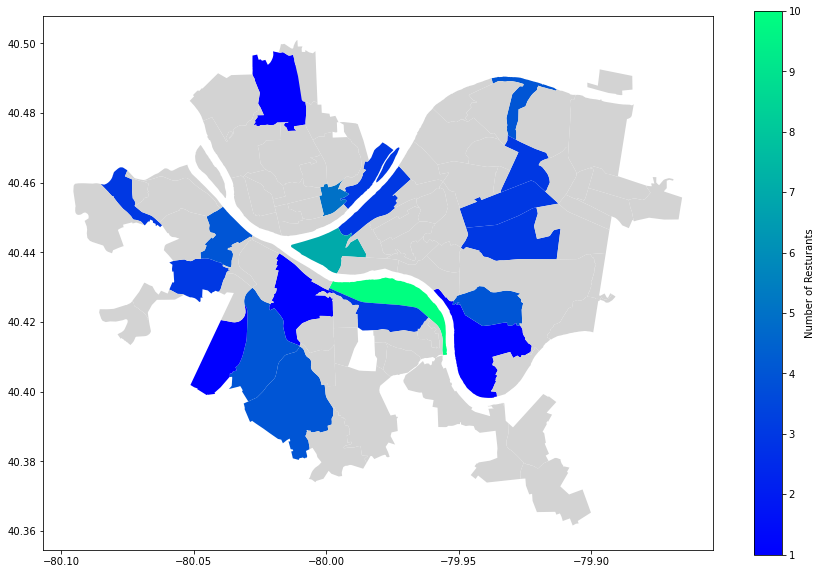

In [5]:
# Plot  our data using our dictionary
df = pd.DataFrame({"neighborhoods":communityFishFryCount.keys(), "count":communityFishFryCount.values()})
city = geo.read_file("Maps/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Resturants"})

In [66]:
communityFinalCount = {}

csv = pd.read_csv("TrafficData.csv")

# Display
trafficData = pd.DataFrame(csv)
trafficData = trafficData[["average_daily_car_traffic", "neighborhood"]]
trafficData = trafficData.dropna()

for index, row in trafficData.iterrows():
    trafficCount = row["average_daily_car_traffic"]
    neighborhood = row["neighborhood"]
    
    if not neighborhood in communityTrafficCount:
        communityTrafficCount[neighborhood] = trafficCount

for key, value in communityFishFryCount.items():
    if key in communityTrafficCount:
        communityFinalCount[key] = int(communityFishFryCount[key] * 10000 / communityTrafficCount[key])

<AxesSubplot:>

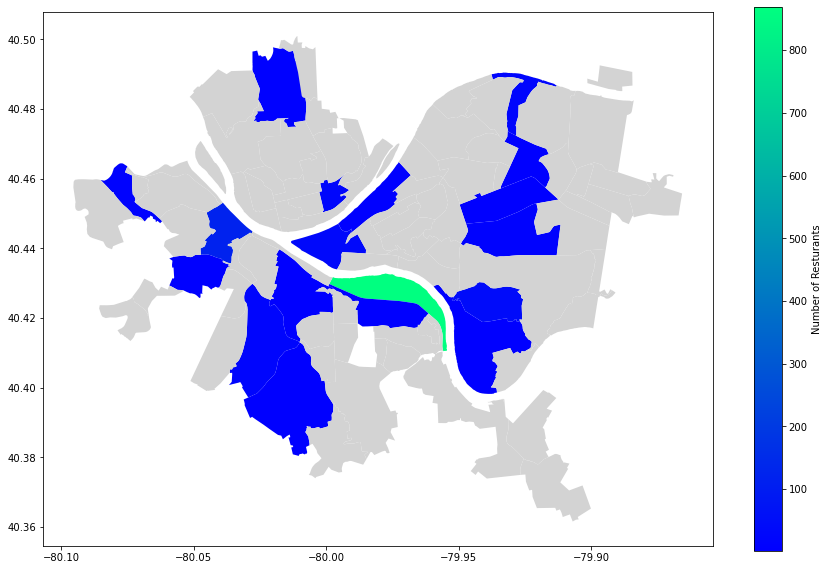

In [67]:
df = pd.DataFrame({"neighborhoods":communityFinalCount.keys(), "count":communityFinalCount.values()})
city = geo.read_file("Maps/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Resturants"})